## Classification NLP model 

#### Import lib

In [61]:
import pandas as pd
import numpy as np
import csv
import json
import json
#import matplotlib.pyplot as plt


# Preprocessing text
from tqdm import tqdm
import nltk

#import string
#from wordcloud import WordCloud, STOPWORDS
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#import nltk
#nltk.download('wordnet')
#from nltk.stem import WordNetLemmatizer
#
#
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix, classification_report
#
#
#import warnings
#import scipy
#from datetime import timedelta
#
## Forceasting with decompasable model
#from pylab import rcParams
#import statsmodels.api as sm
#from statsmodels.tsa.stattools import adfuller
#
## For marchine Learning Approach
#from statsmodels.tsa.tsatools import lagmat
#from sklearn.linear_model import LinearRegression, RidgeCV
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import r2_score
#
## Visualisation
#import matplotlib.pyplot as plt
#import seaborn as sns
#
#plt.style.use('fivethirtyeight')
#
#warnings.filterwarnings('ignore')

#### Carregando a informação

In [8]:
# DF 01: Gener Dataset
path = "./data_base/movie.metadata.tsv"
df_raw = pd.read_csv(path, sep = '\t', header = None)
df_raw.columns = ["movie_id",1,"movie_name",3,4,5,6,7,"genre"]
df_raw.head(5)

,movie_id,1,movie_name,3,4,5,6,7,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [9]:
# DF 02: Summaries 

plots = []

path_02 = "./data_base/plot_summaries.txt"
with open(path_02, 'r') as f:
    reader = csv.reader(f, dialect="excel-tab")
    for row in tqdm(reader):
        plots.append(row)

42303it [00:00, 43347.57it/s]


In [10]:
## Separete the two object of the list and create a df

movie_id = []
plot = []

for _ in tqdm(plots):
    movie_id.append(_[0])
    plot.append(_[1])

summary_df = pd.DataFrame({'movie_id': movie_id
                         ,'summary': plot})

summary_df.head()

100%|██████████| 42303/42303 [00:00<00:00, 848054.42it/s]


,movie_id,summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [11]:
## Check id types
print(df_raw.dtypes, "\n"*2, summary_df.dtypes, "\n"*2) 

df_raw['movie_id'] = df_raw['movie_id'].apply(str)

## merge df 
summary_df = pd.merge(summary_df,df_raw[['movie_id', 'movie_name', 'genre']],on = 'movie_id')

summary_df.head()

movie_id        int64
1              object
movie_name     object
3              object
4             float64
5             float64
6              object
7              object
genre          object
dtype: object 

 movie_id    object
summary     object
dtype: object 




,movie_id,summary,movie_name,genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci..."
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""..."
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."


In [12]:
# Check target information

print(summary_df['genre'][0],'\n'
     ,type(json.loads(summary_df['genre'][0])),'\n'
     #,json.loads(summary_df['genre'][0].values()),'/n'
     )

{"/m/07s9rl0": "Drama", "/m/03q4nz": "World cinema"} 
 <class 'dict'> 



In [43]:
## Json data handling

def json_handling(df,col):
    
    col_gen = []

    for _ in range(df.shape[0]):
        sub_line = json.loads(df[col][_])
        item = pd.json_normalize(sub_line).values
        col_gen.append(list(item[0]))
    
    return col_gen 


summary_df['genre_list'] = json_handling(summary_df,col='genre')
summary_df.head()

In [58]:
### sum genre

def sum_genre(df):
    objects = []

    for _ in range(len(df)):
        objects = objects+df[_]
    
    print("Total genre: {}".format(len(np.unique(objects))))

    return objects

objects = sum_genre(summary_df['genre_list'])

Total genre: 363


In [78]:
pd.DataFrame(nltk.FreqDist(np.unique(objects)),index=[0]).T.sort_values(by=[0],ascending=False)

,0
Absurdism,1
Outlaw,1
Nuclear warfare,1
Northern,1
Ninja movie,1
...,...
Educational,1
Education,1
Early Black Cinema,1
Ealing Comedies,1


['Drama', 'World cinema']

In [89]:
stdf = summary_df['genre'].apply(json.loads)
stlst = list(stdf)
stjson = json.dumps(stlst)
#summary_df.join(pd.read_json(stjson))

In [14]:
!pip install jsonlib

  Using cached jsonlib-1.6.1.tar.gz (43 kB)
  ERROR: Command errored out with exit status 1:
   command: /home/samuel/anaconda3/envs/nlp_env_001/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-kgdszt8d/jsonlib_c1c2bbc9048e4307b75f61eb6366af7c/setup.py'"'"'; __file__='"'"'/tmp/pip-install-kgdszt8d/jsonlib_c1c2bbc9048e4307b75f61eb6366af7c/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-enm2jf1_
       cwd: /tmp/pip-install-kgdszt8d/jsonlib_c1c2bbc9048e4307b75f61eb6366af7c/
  Complete output (381 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.9
  copying jsonlib.py -> build/lib.linux-x86_64-3.9
  running build_ext
  build

In [143]:
!pip install os, sys, setuptools, tokenize

ERROR: Invalid requirement: 'os,'


In [144]:
summary_df['genre'].apply(jsonlib.loads())

NameError: name 'jsonlib' is not defined

In [ ]:
#pd.DataFrame()
summary_df['genre'][0].split([":",','])[]

In [114]:
summary_df['teste_genre'] = summary_df['genre'].apply(json.loads)
summary_df['teste_genre']

0        {'/m/07s9rl0': 'Drama', '/m/03q4nz': 'World ci...
1        {'/m/03btsm8': 'Action/Adventure', '/m/06n90':...
2        {'/m/04t36': 'Musical', '/m/02kdv5l': 'Action'...
3        {'/m/06qm3': 'Screwball comedy', '/m/01z4y': '...
4        {'/m/0lsxr': 'Crime Fiction', '/m/07s9rl0': 'D...
                               ...                        
42199                          {'/m/0bj8m2': 'Children's'}
42200    {'/m/06ppq': 'Silent film', '/m/0219x_': 'Indi...
42201    {'/m/02hmvc': 'Short Film', '/m/04rlf': 'Music...
42202                              {'/m/07s9rl0': 'Drama'}
42203                               {'/m/01z4y': 'Comedy'}
Name: teste_genre, Length: 42204, dtype: object

In [118]:
#summary_df['genre'].apply(json.loads)[0][]
pd.read_json(summary_df['genre'].apply(json.loads))

TypeError: argument of type 'method' is not iterable

In [90]:
summary_df

,movie_id,summary,movie_name,genre
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues,"{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci..."
1,31186339,The nation of Panem consists of a wealthy Capi...,The Hunger Games,"{""/m/03btsm8"": ""Action/Adventure"", ""/m/06n90"":..."
2,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham,"{""/m/04t36"": ""Musical"", ""/m/02kdv5l"": ""Action""..."
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid,"{""/m/06qm3"": ""Screwball comedy"", ""/m/01z4y"": ""..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark,"{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
...,...,...,...,...
42199,34808485,"The story is about Reema , a young Muslim scho...",Oomakkuyil Padumbol,"{""/m/0bj8m2"": ""Children's""}"
42200,1096473,"In 1928 Hollywood, director Leo Andreyev look...",The Last Command,"{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi..."
42201,35102018,American Luthier focuses on Randy Parsons’ tra...,Randy Parsons: American Luthier,"{""/m/02hmvc"": ""Short Film"", ""/m/04rlf"": ""Music..."
42202,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala,"{""/m/07s9rl0"": ""Drama""}"


In [91]:

## Review tqdm

## review With

In [92]:
b = pd.read_csv(path_02,sep = "\s+")

ParserError: Error tokenizing data. C error: Expected 775 fields in line 4, saw 833


In [ ]:
b

,"23890098\tShlykov, a hard-working taxi driver and Lyosha, a saxophonist, develop a bizarre love-hate relationship, and despite their prejudices, realize they aren't so different after all."
0,31186339\tThe nation of Panem consists of a we...
1,20663735\tPoovalli Induchoodan is sentenced f...
2,"2231378\tThe Lemon Drop Kid , a New York City ..."
3,595909\tSeventh-day Adventist Church pastor Mi...
4,5272176\tThe president is on his way to give a...
...,...
42300,"34808485\tThe story is about Reema , a young M..."
42301,"1096473\tIn 1928 Hollywood, director Leo Andre..."
42302,35102018\tAmerican Luthier focuses on Randy Pa...
42303,"8628195\tAbdur Rehman Khan , a middle-aged dry..."


In [ ]:
df_raw

,movie_id,1,movie_name,3,4,5,6,7,genre
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [ ]:
list(df_01.columns[50])

['2', '0', '1', '5', '-', '0', '8', '-', '1', '9']

In [ ]:
## Select the last 50 dates and reshape the df
train_flattened = pd.melt(df_01[list(df_01.columns[-50:])+['Page']], id_vars = 'Page'
                          ,var_name='date', value_name='Visits')

train_flattened.head(10)


,Page,date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2016-11-12,13.0
1,2PM_zh.wikipedia.org_all-access_spider,2016-11-12,12.0
2,3C_zh.wikipedia.org_all-access_spider,2016-11-12,6.0
3,4minute_zh.wikipedia.org_all-access_spider,2016-11-12,38.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2016-11-12,13.0
5,5566_zh.wikipedia.org_all-access_spider,2016-11-12,22.0
6,91Days_zh.wikipedia.org_all-access_spider,2016-11-12,11.0
7,A'N'D_zh.wikipedia.org_all-access_spider,2016-11-12,81.0
8,AKB48_zh.wikipedia.org_all-access_spider,2016-11-12,25.0
9,ASCII_zh.wikipedia.org_all-access_spider,2016-11-12,32.0


In [ ]:
## modifie date
train_flattened['date'] = train_flattened['date'].astype('datetime64[ns]')

## modifie weekend
train_flattened['weekend'] = ((train_flattened.date.dt.dayofweek) // 5 == 1).astype(float)
train_flattened.head(5)

,Page,date,Visits,weekend
0,2NE1_zh.wikipedia.org_all-access_spider,2016-11-12,13.0,1.0
1,2PM_zh.wikipedia.org_all-access_spider,2016-11-12,12.0,1.0
2,3C_zh.wikipedia.org_all-access_spider,2016-11-12,6.0,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2016-11-12,38.0,1.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2016-11-12,13.0,1.0


In [ ]:
# Median by page
df_median = pd.DataFrame(train_flattened.groupby(['Page'])['Visits'].median())
df_median.columns = ['median']

# Average by page
df_mean = pd.DataFrame(train_flattened.groupby(['Page'])['Visits'].mean())
df_mean.columns = ['mean']

# Merging data
train_flattened = train_flattened.set_index('Page').join(df_mean).join(df_median)

In [ ]:
train_flattened.reset_index(drop=False,inplace=True)

,Page,date,Visits,weekend,mean,median
0,!vote_en.wikipedia.org_all-access_all-agents,2016-11-12,2.0,1.0,2.836735,2.0
1,!vote_en.wikipedia.org_all-access_all-agents,2016-11-13,2.0,1.0,2.836735,2.0
2,!vote_en.wikipedia.org_all-access_all-agents,2016-11-14,4.0,0.0,2.836735,2.0
3,!vote_en.wikipedia.org_all-access_all-agents,2016-11-15,8.0,0.0,2.836735,2.0
4,!vote_en.wikipedia.org_all-access_all-agents,2016-11-16,3.0,0.0,2.836735,2.0
...,...,...,...,...,...,...
7253145,［Alexandros］_ja.wikipedia.org_mobile-web_all-a...,2016-12-27,2336.0,0.0,3457.740000,2791.0
7253146,［Alexandros］_ja.wikipedia.org_mobile-web_all-a...,2016-12-28,2455.0,0.0,3457.740000,2791.0
7253147,［Alexandros］_ja.wikipedia.org_mobile-web_all-a...,2016-12-29,3302.0,0.0,3457.740000,2791.0
7253148,［Alexandros］_ja.wikipedia.org_mobile-web_all-a...,2016-12-30,2789.0,0.0,3457.740000,2791.0


In [ ]:
 train_flattened['date']

Page
!vote_en.wikipedia.org_all-access_all-agents          2016-11-12
!vote_en.wikipedia.org_all-access_all-agents          2016-11-13
!vote_en.wikipedia.org_all-access_all-agents          2016-11-14
!vote_en.wikipedia.org_all-access_all-agents          2016-11-15
!vote_en.wikipedia.org_all-access_all-agents          2016-11-16
                                                         ...    
［Alexandros］_ja.wikipedia.org_mobile-web_all-agents   2016-12-27
［Alexandros］_ja.wikipedia.org_mobile-web_all-agents   2016-12-28
［Alexandros］_ja.wikipedia.org_mobile-web_all-agents   2016-12-29
［Alexandros］_ja.wikipedia.org_mobile-web_all-agents   2016-12-30
［Alexandros］_ja.wikipedia.org_mobile-web_all-agents   2016-12-31
Name: date, Length: 7253150, dtype: datetime64[ns]

In [ ]:
train_flattened['weekday'] = train_flattened['date'].apply(lambda x: x.weekday())

In [ ]:
# Feature engineering with the date
train_flattened['year']=train_flattened.date.dt.year 
train_flattened['month']=train_flattened.date.dt.month 
train_flattened['day']=train_flattened.date.dt.day

In [ ]:
train_flattened.reset_index(inplace=True)

#### Aggregation and Visualisation

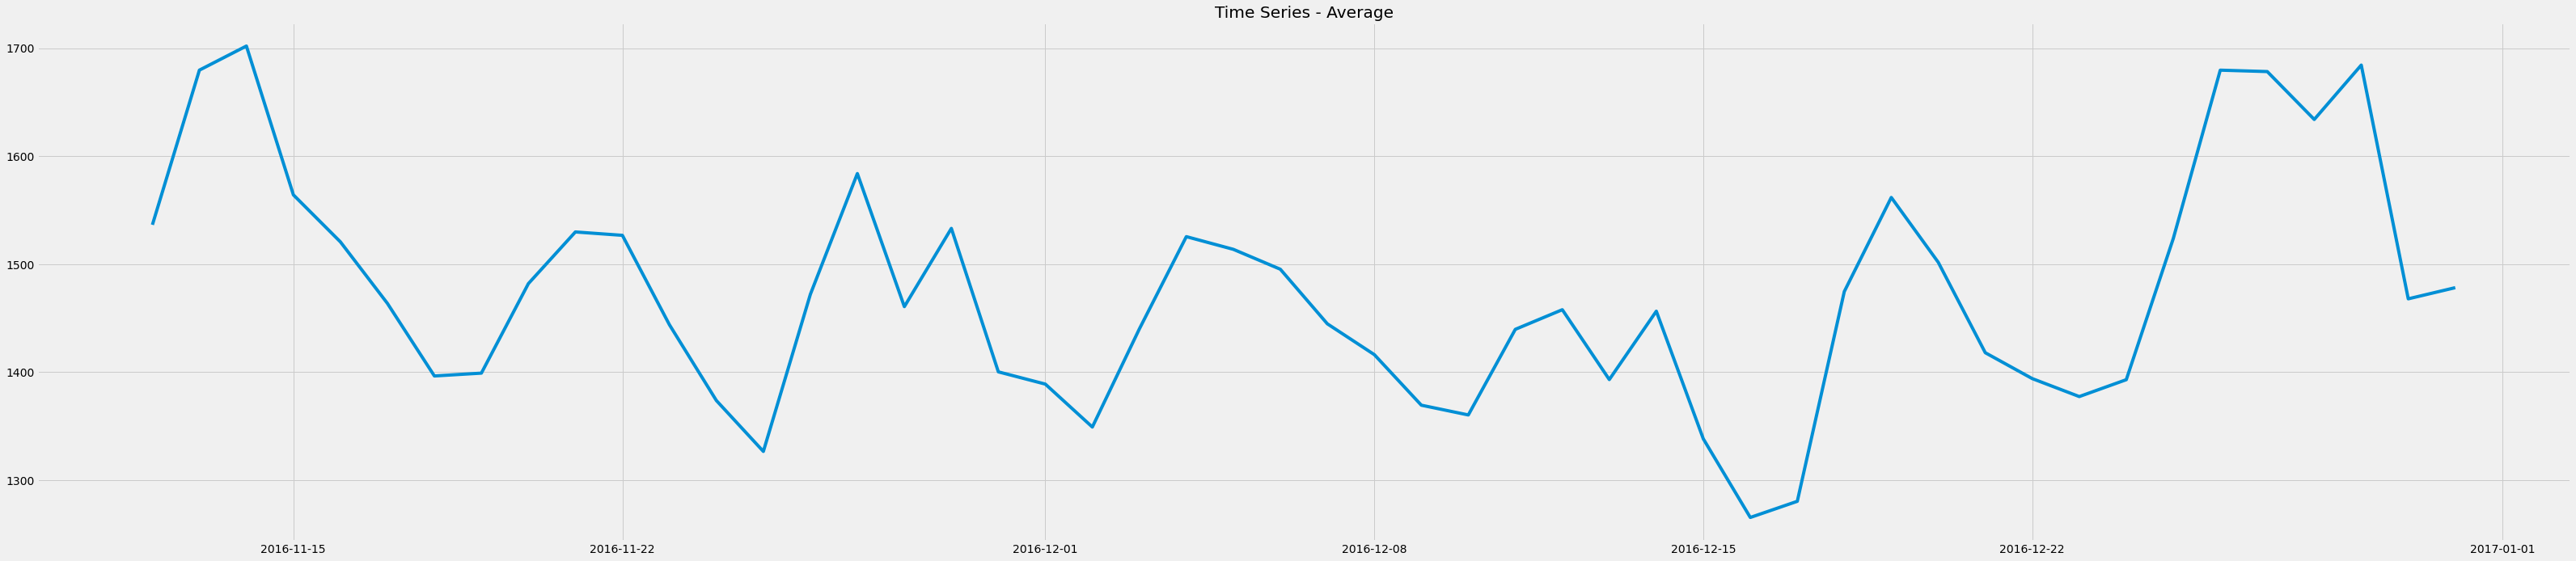

In [ ]:
plt.figure(figsize=(50, 11))
mean_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].mean()
plt.plot(mean_group)
plt.title('Time Series - Average')
plt.show()

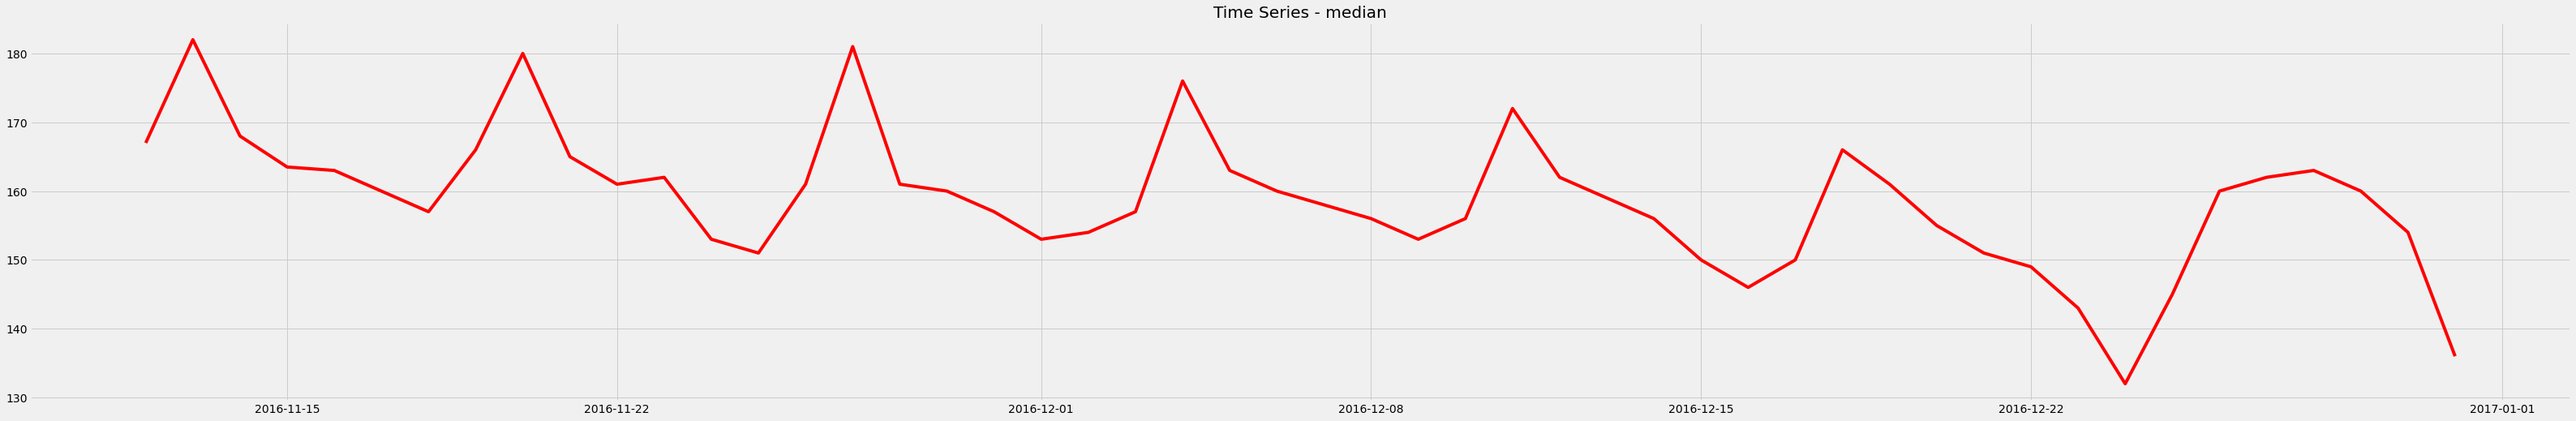

In [ ]:
plt.figure(figsize=(50, 8))
median_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].median()
plt.plot(median_group, color = 'r')
plt.title('Time Series - median')
plt.show()

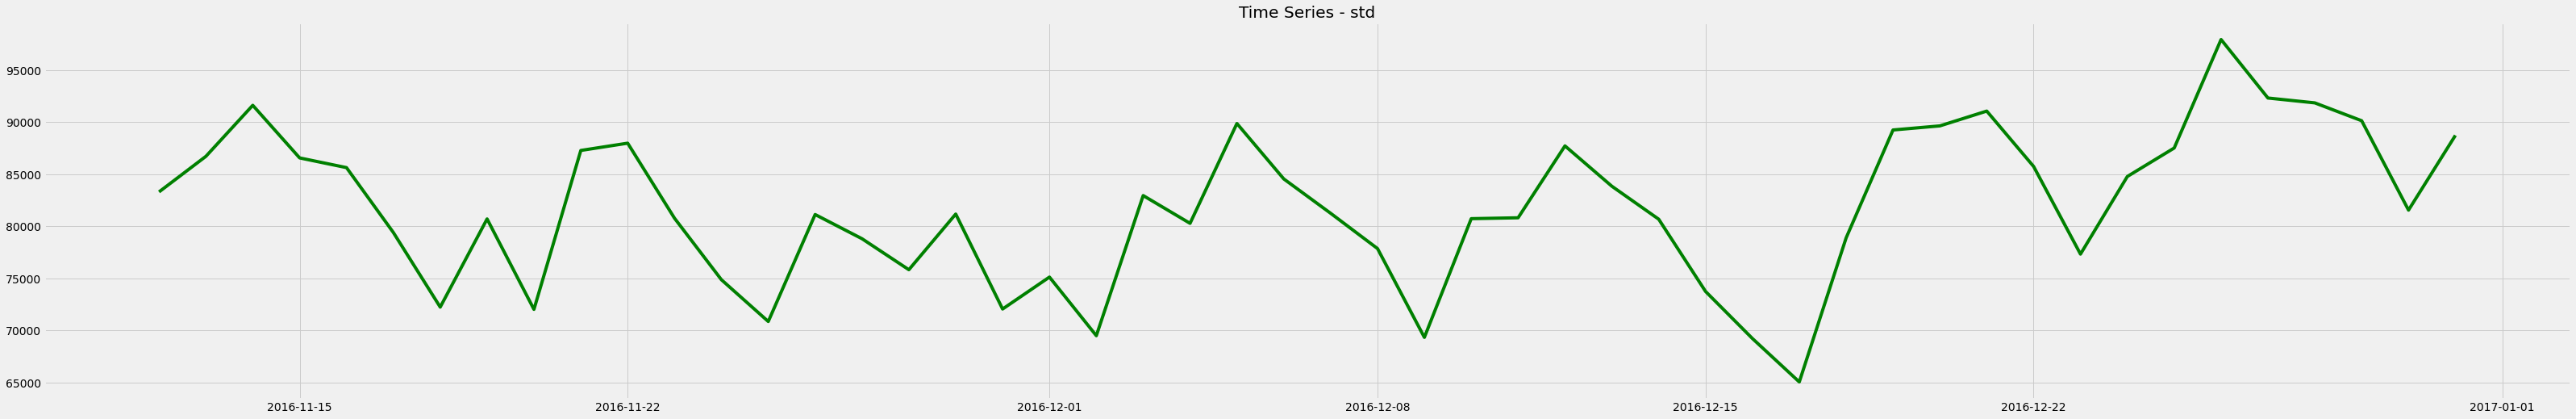

In [ ]:
plt.figure(figsize=(50, 8))
std_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].std()
plt.plot(std_group, color = 'g')
plt.title('Time Series - std')
plt.show()

In [ ]:
# For the next graphics
train_flattened['month_num'] = train_flattened['month']
train_flattened['month'].replace('11','11 - November',inplace=True)
train_flattened['month'].replace('12','12 - December',inplace=True)

train_flattened['weekday_num'] = train_flattened['weekday']
train_flattened['weekday'].replace(0,'01 - Monday',inplace=True)
train_flattened['weekday'].replace(1,'02 - Tuesday',inplace=True)
train_flattened['weekday'].replace(2,'03 - Wednesday',inplace=True)
train_flattened['weekday'].replace(3,'04 - Thursday',inplace=True)
train_flattened['weekday'].replace(4,'05 - Friday',inplace=True)
train_flattened['weekday'].replace(5,'06 - Saturday',inplace=True)
train_flattened['weekday'].replace(6,'07 - Sunday',inplace=True)

In [ ]:
train_group = train_flattened.groupby(["month", "weekday"])['Visits'].mean().reset_index()
train_group = train_group.pivot('weekday','month','Visits')
train_group.sort_index(inplace=True)
train_group

month,11,12
weekday,,
01 - Monday,1564.058295,1553.219910
02 - Tuesday,1541.318249,1517.166439
03 - Wednesday,1454.986458,1488.305696
04 - Thursday,1418.773382,1444.474767
05 - Friday,1361.625633,1365.955630
06 - Saturday,1469.242102,1390.486246
07 - Sunday,1581.814364,1490.858833


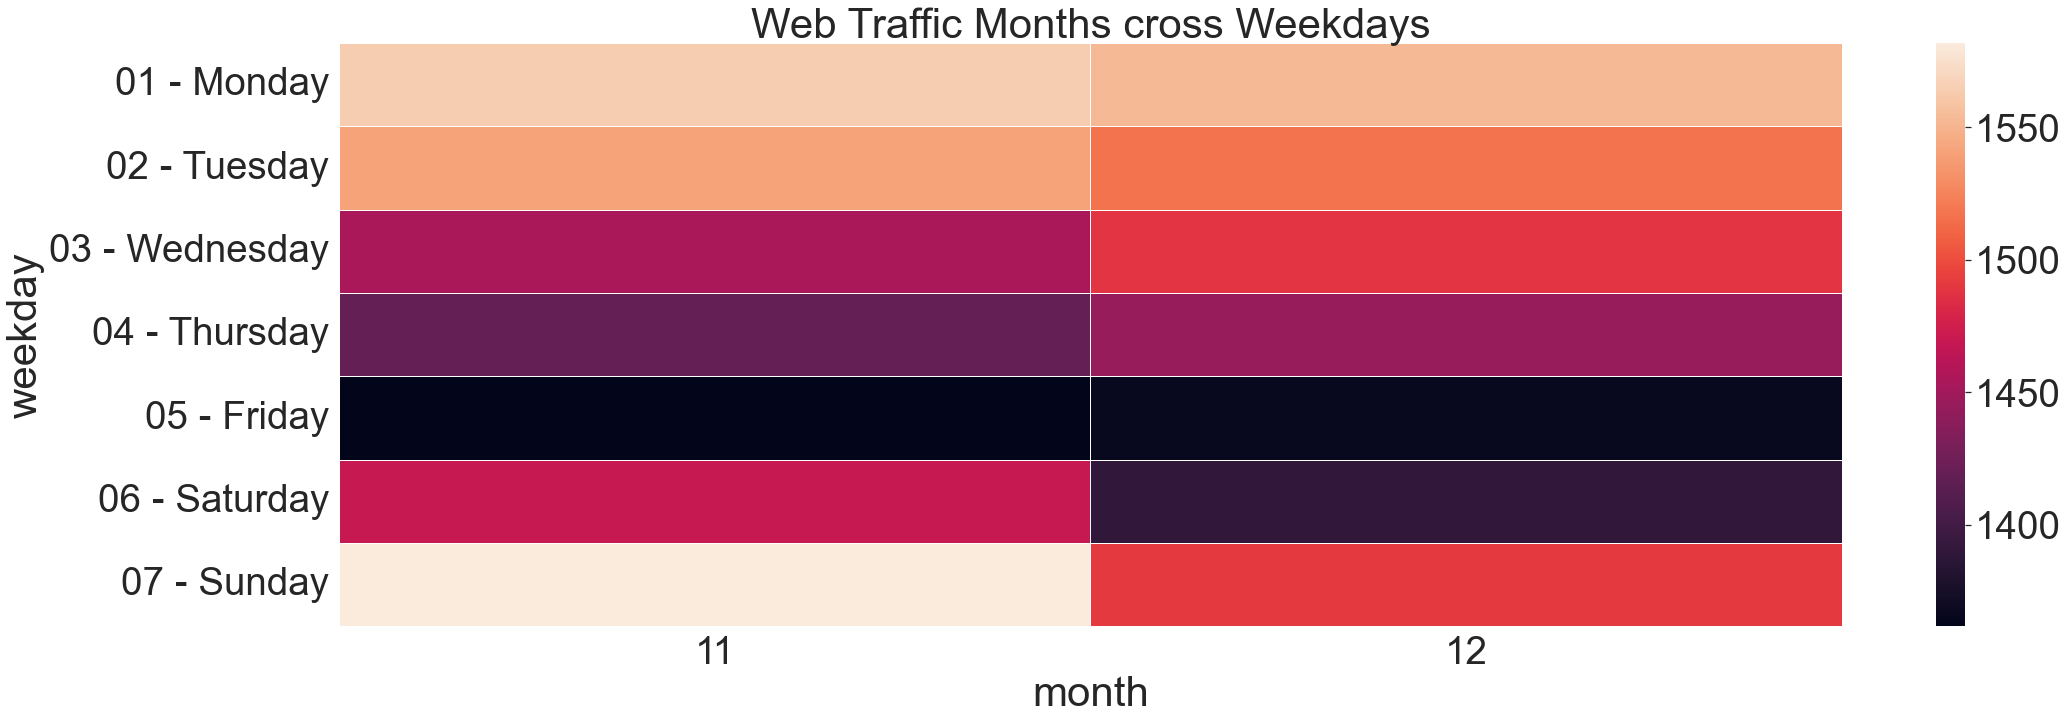

In [ ]:
sns.set(font_scale=3.5) 

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(train_group, annot=False, ax=ax, fmt="d", linewidths=1)
plt.title('Web Traffic Months cross Weekdays')
plt.show()

In [ ]:
train_day = train_flattened.groupby(["month", "day"])['Visits'].mean().reset_index()
train_day = train_day.pivot('day','month','Visits')
train_day.sort_index(inplace=True)
train_day.dropna(inplace=True)
train_day

month,11,12
day,,
12,1536.471757,1457.877654
13,1679.630589,1393.217357
14,1701.941831,1456.495662
15,1564.172228,1338.356251
16,1520.673959,1265.571850
17,1463.751937,1280.523597
18,1396.544145,1474.682207
19,1399.170412,1561.789931
20,1482.018739,1501.701358


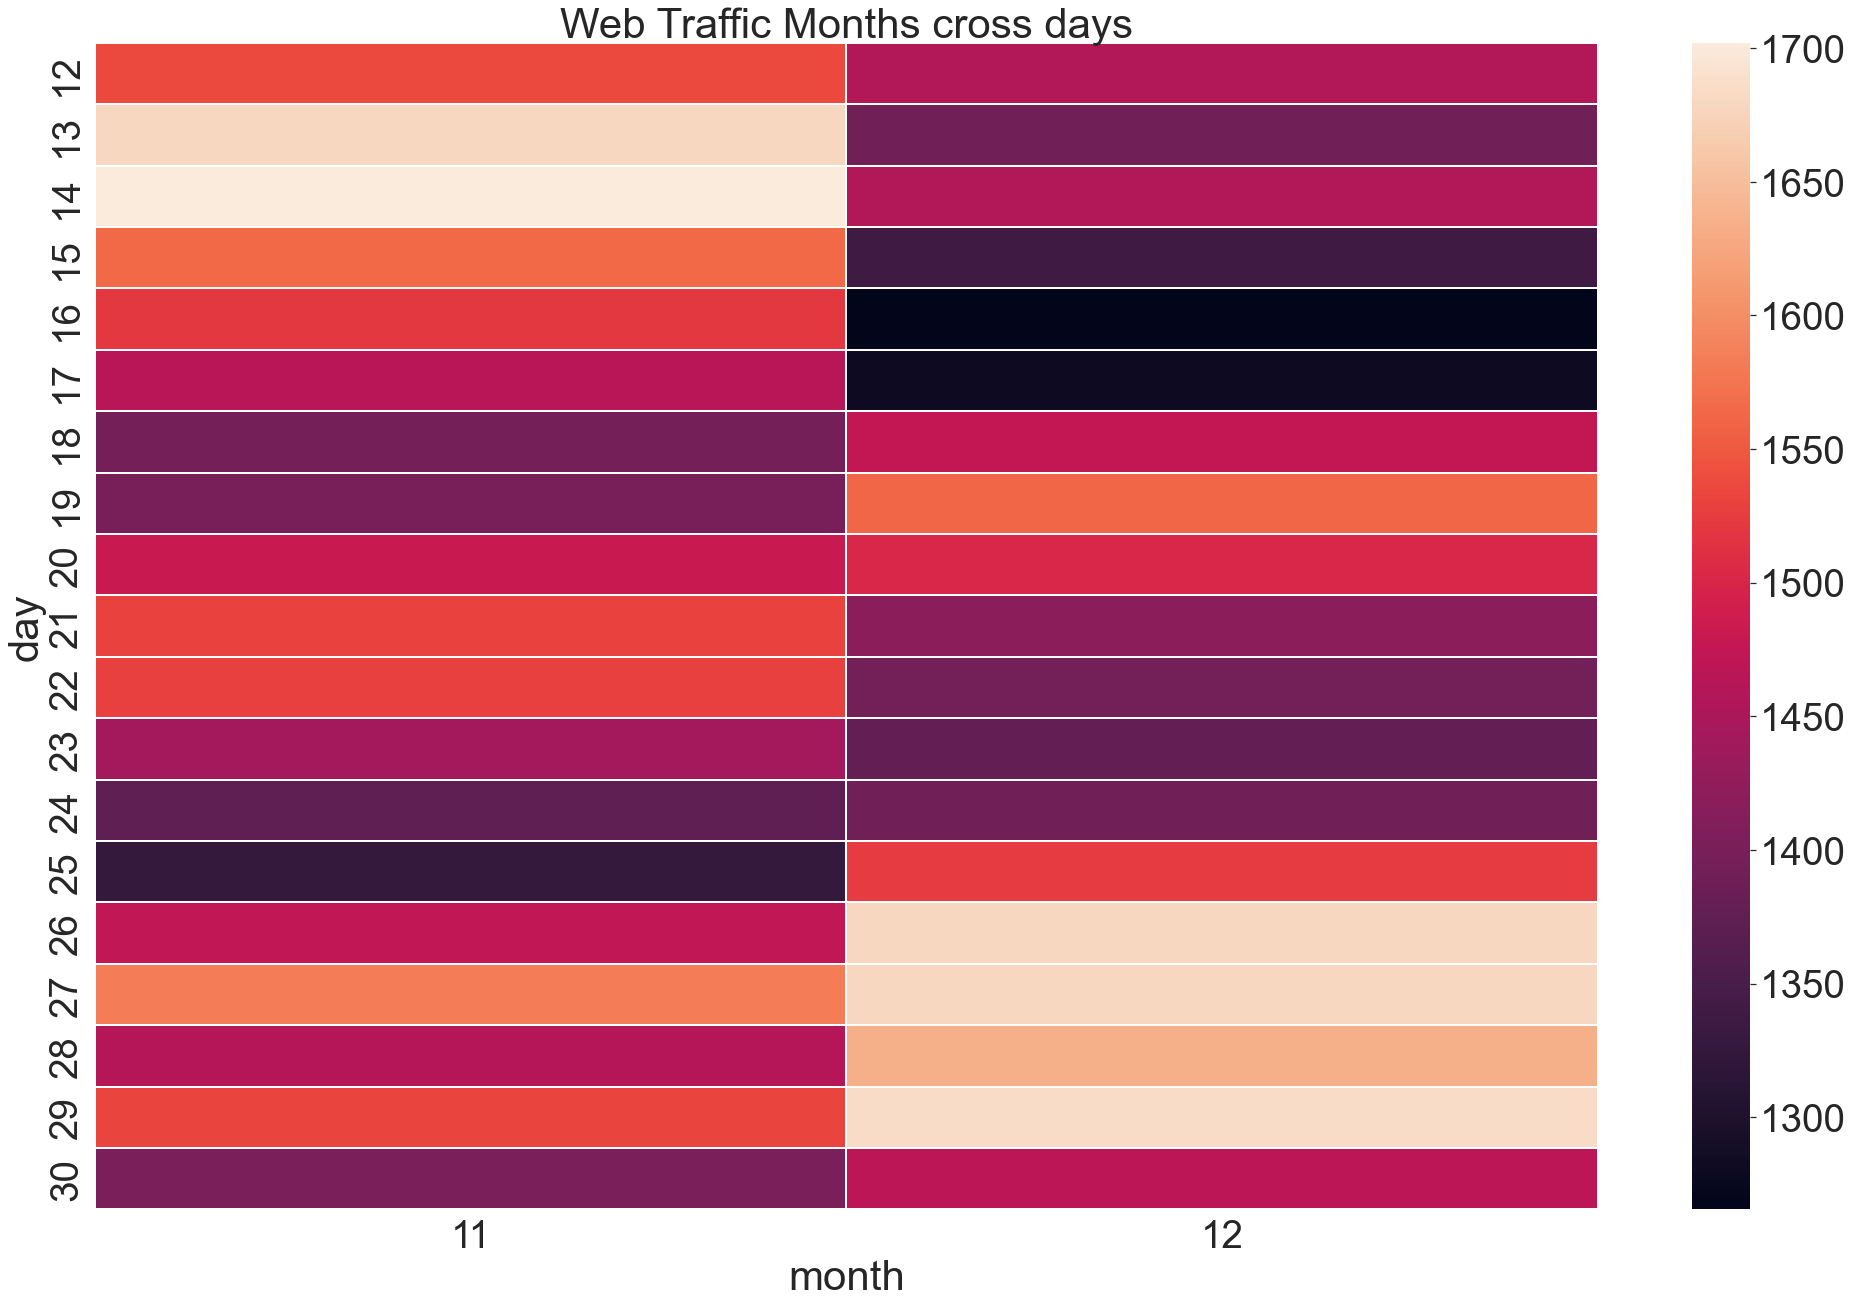

In [ ]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(train_day, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Web Traffic Months cross days')
plt.show()

#### ML Approach

In [ ]:
times_series_means =  pd.DataFrame(mean_group).reset_index(drop=False)
times_series_means['weekday'] = times_series_means['date'].apply(lambda x: x.weekday())
times_series_means['Date_str'] = times_series_means['date'].apply(lambda x: str(x))
times_series_means[['year','month','day']] = pd.DataFrame(times_series_means['Date_str'].str.split('-',2).tolist(), columns = ['year','month','day'])
date_staging = pd.DataFrame(times_series_means['day'].str.split(' ',2).tolist(), columns = ['day','other'])
times_series_means['day'] = date_staging['day']*1
times_series_means.drop('Date_str',axis = 1, inplace =True)
times_series_means.head()


,date,Visits,weekday,year,month,day
0,2016-11-12,1536.471757,5,2016,11,12
1,2016-11-13,1679.630589,6,2016,11,13
2,2016-11-14,1701.941831,0,2016,11,14
3,2016-11-15,1564.172228,1,2016,11,15
4,2016-11-16,1520.673959,2,2016,11,16


In [ ]:
times_series_means.reset_index(drop=True,inplace=True)

In [ ]:
def diff_creation(data):
    data["diff"] = np.nan
    data.loc[1:, "diff"] = (data.iloc[1:, 1].to_numpy() - data.iloc[:len(data)-1, 1].to_numpy())
    return data


def lag_func(data,lag):
    lag = lag
    X = lagmat(data["diff"], lag)
    lagged = data.copy()
    for c in range(1,lag+1):
        lagged["lag%d" % c] = X[:, c-1]
    return lagged

    
df_count = diff_creation(times_series_means)
# Creation of 7 features with "diff"
lag = 7
lagged = lag_func(df_count,lag)
last_date = lagged['date'].max()

In [ ]:
lagged.head()

,date,Visits,weekday,year,month,day,diff,lag1,lag2,lag3,lag4,lag5,lag6,lag7
0,2016-11-12,1536.471757,5,2016,11,12,NaN,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,2016-11-13,1679.630589,6,2016,11,13,143.158833,NaN,0.000000,0.000000,0.0,0.0,0.0,0.0
2,2016-11-14,1701.941831,0,2016,11,14,22.311241,143.158833,NaN,0.000000,0.0,0.0,0.0,0.0
3,2016-11-15,1564.172228,1,2016,11,15,-137.769602,22.311241,143.158833,NaN,0.0,0.0,0.0,0.0
4,2016-11-16,1520.673959,2,2016,11,16,-43.498270,-137.769602,22.311241,143.158833,NaN,0.0,0.0,0.0


In [ ]:
["lag%d" % 3 for i in range(1,lag+1)]

['lag3', 'lag3', 'lag3', 'lag3', 'lag3', 'lag3', 'lag3']

In [ ]:
lagmat(df_count["diff"], lag)

array([[   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [          nan,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [ 143.15883278,           nan,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ],
       [  22.31124131,  143.15883278,           nan,    0.        ,
           0.        ,    0.        ,    0.        ],
       [-137.76960222,   22.31124131,  143.15883278,           nan,
           0.        ,    0.        ,    0.        ],
       [ -43.49826973, -137.76960222,   22.31124131,  143.15883278,
                  nan,    0.        ,    0.        ],
       [ -56.922022  ,  -43.49826973, -137.76960222,   22.31124131,
         143.15883278,           nan,    0.        ],
       [ -67.20779131,  -56.922022  ,  -43.49826973, -137.76960222,
          22.31124131,  143.15883278,           nan],
       [   2.62626645,  

In [ ]:
times_series_means.reset_index(drop=True,inplace=True)

def lag_func(data,lag):
    lag = lag
    X = lagmat(data["diff"], lag)
    lagged = data.copy()
    for c in range(1,lag+1):
        lagged["lag%d" % c] = X[:, c-1]
    return lagged

def diff_creation(data):
    data["diff"] = np.nan
    data.loc[1:, "diff"] = (data.iloc[1:, 1].to_numpy() - data.iloc[:len(data)-1, 1].to_numpy())
    return data

df_count = diff_creation(times_series_means)

# Creation of 7 features with "diff"
lag = 7
lagged = lag_func(df_count,lag)
last_date = lagged['date'].max()

In [ ]:
df_count.ix[1:, "diff"]

AttributeError: 'DataFrame' object has no attribute 'ix'

In [ ]:
train_flattened.date.dt.year

Page
!vote_en.wikipedia.org_all-access_all-agents           2016
!vote_en.wikipedia.org_all-access_all-agents           2016
!vote_en.wikipedia.org_all-access_all-agents           2016
!vote_en.wikipedia.org_all-access_all-agents           2016
!vote_en.wikipedia.org_all-access_all-agents           2016
                                                       ... 
［Alexandros］_ja.wikipedia.org_mobile-web_all-agents    2016
［Alexandros］_ja.wikipedia.org_mobile-web_all-agents    2016
［Alexandros］_ja.wikipedia.org_mobile-web_all-agents    2016
［Alexandros］_ja.wikipedia.org_mobile-web_all-agents    2016
［Alexandros］_ja.wikipedia.org_mobile-web_all-agents    2016
Name: date, Length: 7253150, dtype: int64

In [ ]:
df_median.columns = ['median']

In [ ]:
df_median.columns

Index(['median'], dtype='object')

In [ ]:
train_flattened.date.dt.dayofweek.unique()

array([5, 6, 0, 1, 2, 3, 4])

In [ ]:
train_flattened[train_flattened['weekend']==0]

,Page,date,Visits,weekend
290126,2NE1_zh.wikipedia.org_all-access_spider,2016-11-14,15.0,0.0
290127,2PM_zh.wikipedia.org_all-access_spider,2016-11-14,14.0,0.0
290128,3C_zh.wikipedia.org_all-access_spider,2016-11-14,2.0,0.0
290129,4minute_zh.wikipedia.org_all-access_spider,2016-11-14,14.0,0.0
290130,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2016-11-14,8.0,0.0
...,...,...,...,...
7108082,Underworld_(serie_de_películas)_es.wikipedia.o...,2016-12-30,5.0,0.0
7108083,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,2016-12-30,NaN,0.0
7108084,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,2016-12-30,NaN,0.0
7108085,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,2016-12-30,NaN,0.0


In [ ]:
link = 'https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv'
df = pd.read_csv(link)
dateparse = lambda dates: datetime.strptime(dates,'%Y-%m')
df = pd.read_csv(link,parse_dates = ['Month'],
                 index_col="Month",date_parser = dateparse)

ts = df['#Passengers']



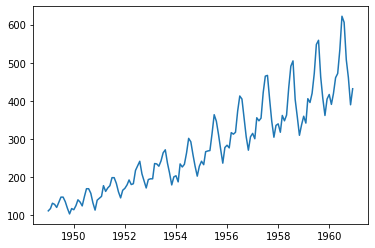

In [ ]:
plt.plot(ts)

In [ ]:
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

#### Criation model with the parameters: p = 2, q = 1, d = 2 

In [ ]:
modelo = ARIMA(ts, order=(2, 1, 2),freq = ts.index.inferred_freq)
modelo_trained = modelo.fit()
modelo_trained.summary()

/home/samuel/anaconda3/envs/time_series_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/samuel/anaconda3/envs/time_series_env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Wed, 13 Apr 2022   AIC                           1353.347
Time:                        20:54:05   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.845      0.000      -2.087      -1.600
ma.L2          0.9953      0.135      7.398      0.000       0.732       1.259
sigma2       665.9646    113.887      5.848      0.000     442.751     889.178
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.59   Prob(JB):                         0.40
Heteroskedasticity (H):               7.38   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Forcasting

In this part is important to mention that we will forcast 12 periods. This is the reason witch i put 12 "steps"

In [ ]:
forscasting_values =  modelo_trained.forecast(steps=12)
forscasting_values

1961-01-01    439.854513
1961-02-01    465.296054
1961-03-01    500.665761
1961-04-01    535.971659
1961-05-01    561.690109
1961-06-01    571.314405
1961-07-01    562.974263
1961-08-01    539.731146
1961-09-01    508.529538
1961-10-01    478.147818
1961-11-01    456.746809
1961-12-01    449.695642
Freq: MS, Name: predicted_mean, dtype: float64

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

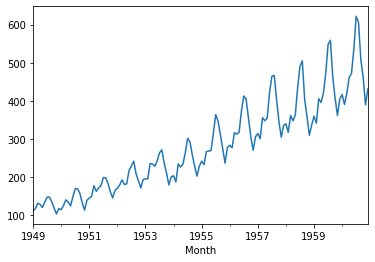

In [ ]:
## Created a plot for the time series with the forcasting
## Put the windows time which will be using to forcating
# plot_insample = True ### plot all the graphic


## finds others examples


eixo = ts.plot()
modelo_trained.plot_predict('1960-01-01','1965-01-01'
                            ,ax = eixo, plot_insample = True)
 

#### Autoarima


In [ ]:
modelo_auto = auto_arima(ts, m = 12, seasonal= True, trace =  False) # Trace = if is equal to True, show all the arima parameters teste
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Wed, 13 Apr 2022   AIC                           1017.847
Time:                                     21:29:40   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.601      0.000      -1.057      -0.907
sigma2       129.3132     14.556      8.884      0.000     100.783     157.843
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
proximos_12 = modelo_auto.predict(n_periods=12)

In [ ]:
proximos_12

array([445.63493355, 420.39502446, 449.19834797, 491.83997601,
       503.39450237, 566.86247078, 654.2601892 , 638.5974932 ,
       540.88373892, 494.12660991, 423.33269015, 465.50754991])

In [ ]:
modelo_auto1 = auto_arima(ts, m = 12, seasonal= True, trace =  True) 
modelo_auto1

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=1.93 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.39 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=1.26 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.30 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=1.37 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.12 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.21 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=1.15 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=1.07 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=2.18 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.10 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.08 sec
 ARIMA(3,1,1)(0,1,0

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)